In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [49]:
# Define image size and directories
IMAGE_SIZE = [299, 299]
train_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\train"
test_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\test"
val_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\val"

In [50]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [51]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)


In [52]:
# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=(299, 299),  # Adjust based on InceptionV3 input size
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(299, 299),  # Adjust based on InceptionV3 input size
    batch_size=32,
    class_mode='categorical'
)

Found 1920 images belonging to 10 classes.
Found 880 images belonging to 10 classes.


In [53]:
# Add preprocessing layer to the front of InceptionV3
inception = InceptionV3(input_shape=(299, 299, 3), weights='imagenet', include_top=False)


In [54]:
# Freeze the layers
for layer in inception.layers:
    layer.trainable = False
    
    # Global Average Pooling
x = GlobalAveragePooling2D()(inception.output)

# Fully Connected Layer
x = Dense(128, activation='relu')(x)

# Output Layer
output_tensor = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inception.input, outputs=output_tensor)

In [55]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [56]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
60/60 [==============================] - 130s 2s/step - loss: 1.1206 - accuracy: 0.6568 - val_loss: 0.5013 - val_accuracy: 0.8591
Epoch 2/10
60/60 [==============================] - 126s 2s/step - loss: 0.4404 - accuracy: 0.8656 - val_loss: 0.3086 - val_accuracy: 0.9091
Epoch 3/10
60/60 [==============================] - 141s 2s/step - loss: 0.3182 - accuracy: 0.9000 - val_loss: 0.2154 - val_accuracy: 0.9409
Epoch 4/10
60/60 [==============================] - 130s 2s/step - loss: 0.2637 - accuracy: 0.9250 - val_loss: 0.1782 - val_accuracy: 0.9466
Epoch 5/10
60/60 [==============================] - 131s 2s/step - loss: 0.2202 - accuracy: 0.9312 - val_loss: 0.1720 - val_accuracy: 0.9455
Epoch 6/10
60/60 [==============================] - 126s 2s/step - loss: 0.1605 - accuracy: 0.9495 - val_loss: 0.1330 - val_accuracy: 0.9534
Epoch 7/10
60/60 [==============================] - 126s 2s/step - loss: 0.1340 - accuracy: 0.9620 - val_loss: 0.1343 - val_accuracy: 0.9670
Epoch 8/10
60

In [57]:
# Save the model
model.save('melon_species_Inceptionv3.h5')

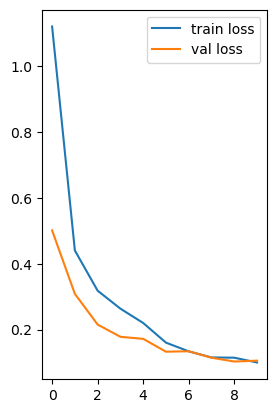

In [58]:
# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

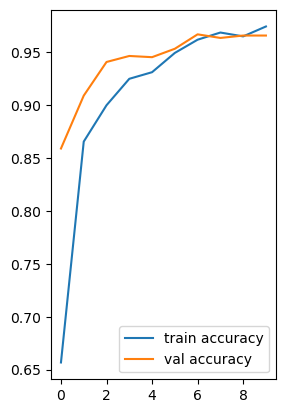

In [59]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()